In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('/home/edvin/Desktop/flib/AMLsim/paramFiles/100K_accts/degree.csv')
df.head()

,Count,In-degree,Out-degree
0,40,0,1
1,13764,0,2
2,4695,0,3
3,967,0,4
4,290,0,5


In [2]:
df['deg'] = df['In-degree'] + df['Out-degree']

In [ ]:
# calc ratio of In-degree to Out-degree
df['ratio'] = df['In-degree'] / df['Out-degree']
df.head()

In [ ]:
rations = []
for row in df.itertuples():
    rations += row.Count * [row.ratio]

rations = [r for r in rations if r != np.inf]
rations = sorted(rations)
dist = np.histogram(rations, bins=300)


In [ ]:
# plot dist as bar plot
plt.bar(dist[1][:-1], dist[0], width=0.1)
plt.xlim(-1, 3)
plt.show()

In [ ]:
plt.hist(rations, bins=300)
plt.xlim(-1, 3)
plt.show()

In [ ]:
degs = []
for row in df.itertuples():
    degs += row.Count * [row._3] if not row._3 == 0 else []
plt.hist(degs, bins=300)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
d = 100
x = np.random.randint(0, d-10, 100000)
y = x/(d-x+0.0001)
y = y[y > 1]
plt.hist(y, bins=100)
#plt.yscale('log')
plt.show()


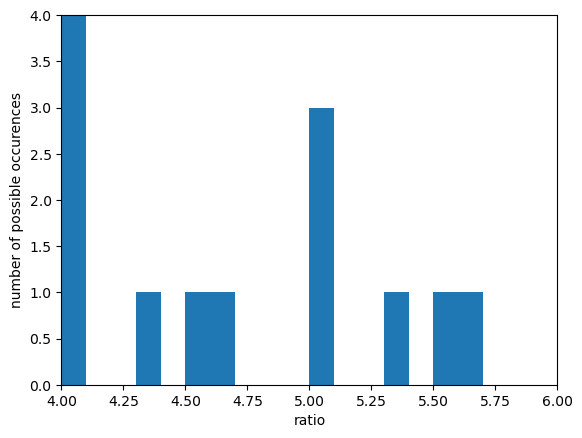

In [203]:
ds = np.arange(1, 21)
rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, range=(0,20), bins=200)
plt.xlim(4, 6)
plt.ylim(0, 4)
plt.ylabel('number of possible occurences')
plt.xlabel('ratio')
plt.show()
        

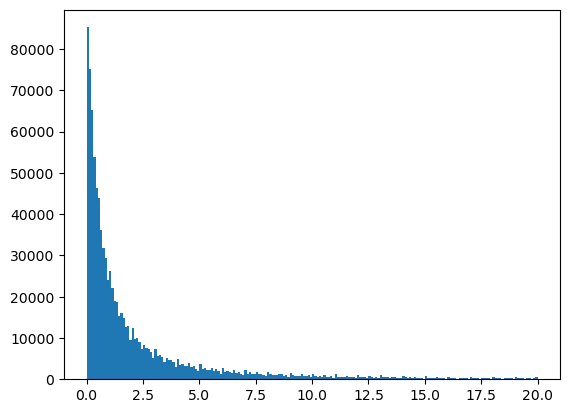

In [180]:
ds = np.random.randint(1, 201, 10000)
rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, range=(0,20), bins=200)
plt.xlim(-1, 21)
plt.show()

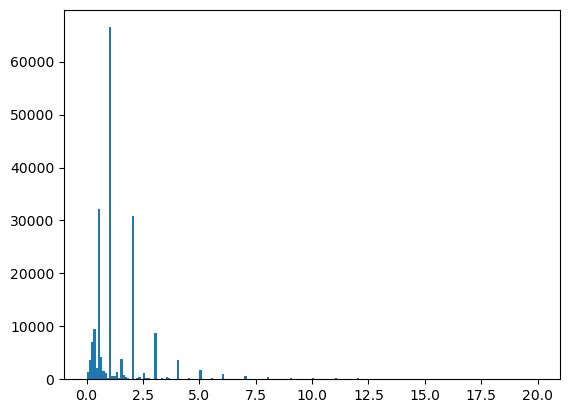

In [194]:
gamma = 2.0
loc = 1.0
scale = 1.0
n = 100000
ds = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()

rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, range=(0,20), bins=200)
plt.xlim(-1, 21)
plt.show()

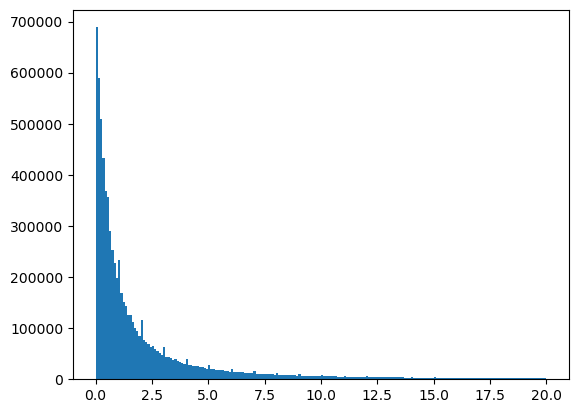

In [196]:
#ds = []
#for row in df.itertuples():
#    ds += row.Count * [row.deg] if not row.deg == 0 else []
gamma = 0.8
loc = 1.0
scale = 1.0
n = 100000
ds = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()

rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]

plt.hist(rs, range=(0,20), bins=200)
plt.xlim(-1, 21)
plt.show()

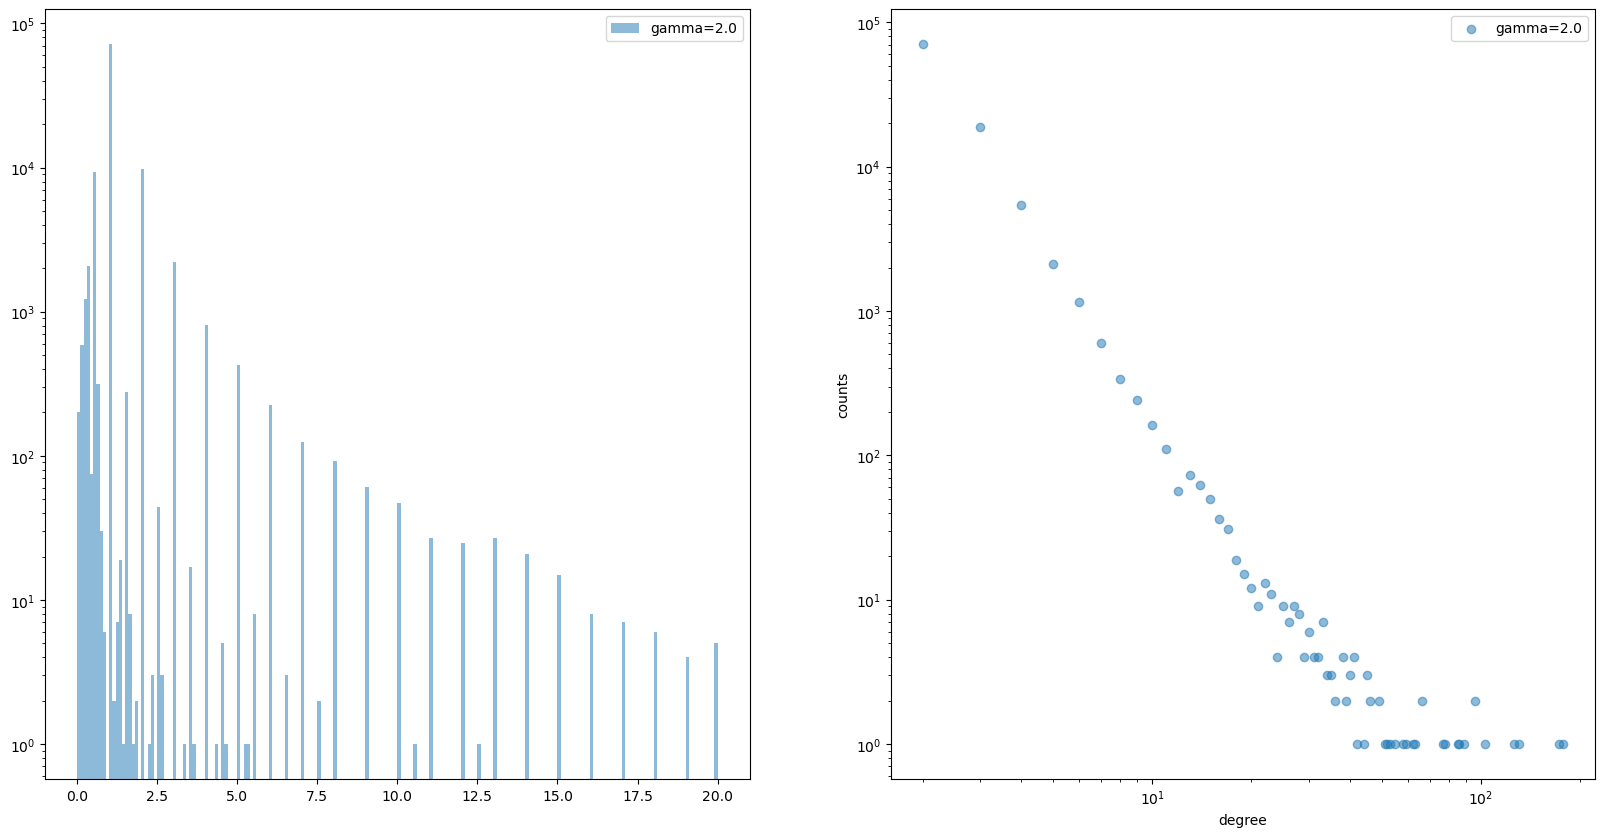

In [198]:
gammas = [2.0]
loc = 1.0
scale = 1.0
n = 100000

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for gamma in gammas:
    in_degrees = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()
    out_degrees = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=43).round()
    in_degrees = in_degrees // 2
    out_degrees = out_degrees // 2
    
    if (in_degrees.sum() + out_degrees.sum()) % 2 != 0:
        if in_degrees.sum() > out_degrees.sum():
            rand_idx = np.random.choice(np.where(in_degrees > 0)[0])
            in_degrees[rand_idx] -= 1
        else:
            rand_idx = np.random.choice(np.where(out_degrees > 0)[0])
            out_degrees[rand_idx] -= 1
    
    i = 0
    while in_degrees.sum() != out_degrees.sum() and i < 10000:
        if in_degrees.sum() > out_degrees.sum():
            rand_idx = np.random.choice(np.where(in_degrees > 1)[0])
            in_degrees[rand_idx] -= 1
            out_degrees[rand_idx] += 1
        else:
            rand_idx = np.random.choice(np.where(out_degrees > 1)[0])
            in_degrees[rand_idx] += 1
            out_degrees[rand_idx] -= 1
        i += 1
    
    if in_degrees.sum() != out_degrees.sum():
        if in_degrees.sum() > out_degrees.sum():
            diff = in_degrees.sum() - out_degrees.sum()
            assert diff % 2 == 0
            in_degrees[np.argmax(in_degrees)] -= diff / 2
            out_degrees[np.argmax(out_degrees)] += diff / 2
        elif in_degrees.sum() < out_degrees.sum():
            diff = out_degrees.sum() - in_degrees.sum()
            assert diff % 2 == 0
            in_degrees[np.argmax(in_degrees)] += diff / 2
            out_degrees[np.argmax(out_degrees)] -= diff / 2
    
    in_out_degrees = np.column_stack((in_degrees, out_degrees))
    in_out_degrees = in_out_degrees[~(in_out_degrees == 0).any(axis=1)]
    in_degrees = in_out_degrees[:, 0]
    out_degrees = in_out_degrees[:, 1]
    
    ds = in_degrees + out_degrees
    rs = in_degrees / out_degrees
    axs[0].hist(rs, range=(0,20), bins=200, alpha=0.5, label=f'gamma={gamma}')
    
    n_nodes, degrees = np.unique(ds, return_counts=True)
    axs[1].scatter(n_nodes, degrees, alpha=0.5, label=f'gamma={gamma}')

axs[0].set_xlim(-1, 21)
axs[0].legend()
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('degree')
axs[1].set_ylabel('counts')
axs[1].legend()
plt.show()


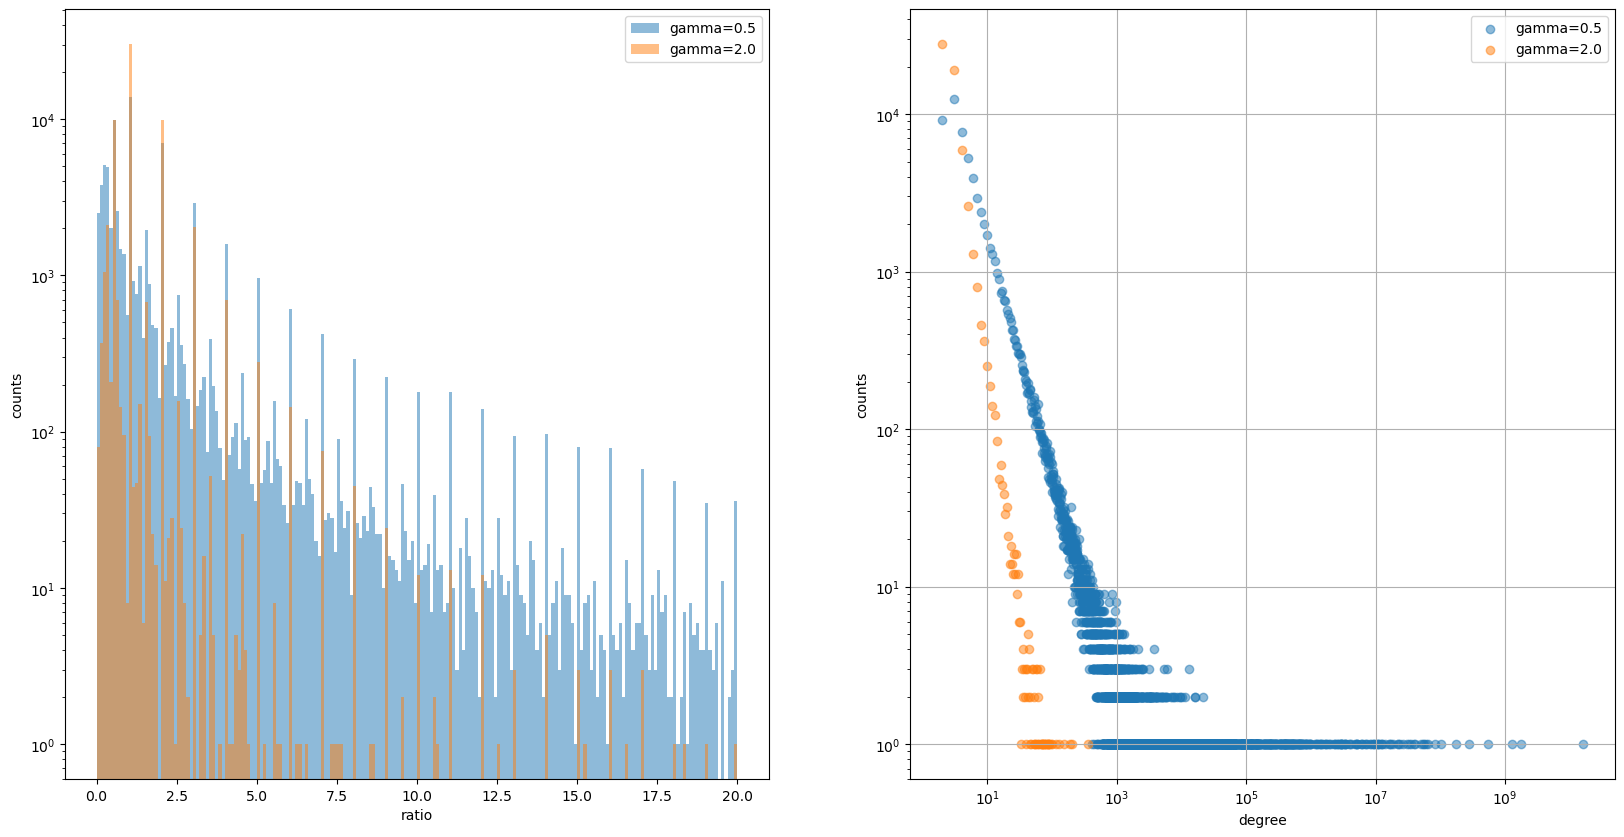

In [209]:
gammas = [0.5, 2.0]
loc = 1.0
scale = 1.0
n = 100000

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for gamma in gammas:
    
    degrees = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()
    if degrees.sum() % 2 == 1:
        degrees[np.random.randint(n)] += 1
    split = np.random.rand(n)
    in_degrees = (degrees*split).round()
    out_degrees = (degrees*(1-split)).round()
    iters = 0
    while in_degrees.sum() != out_degrees.sum() and iters < 10000:
        if in_degrees.sum() > out_degrees.sum():
            idx = np.random.choice(np.where(in_degrees > 1.0)[0])
            in_degrees[idx] -= 1
            out_degrees[np.random.randint(n)] += 1
        else:
            idx = np.random.choice(np.where(out_degrees > 1.0)[0])
            in_degrees[np.random.randint(n)] += 1
            out_degrees[idx] -= 1
        iters += 1
    if in_degrees.sum() > out_degrees.sum():
        diff = in_degrees.sum() - out_degrees.sum()
        assert diff % 2 == 0
        in_degrees[np.argmax(in_degrees)] -= diff / 2
        out_degrees[np.argmax(out_degrees)] += diff / 2
    elif in_degrees.sum() < out_degrees.sum():
        diff = out_degrees.sum() - in_degrees.sum()
        assert diff % 2 == 0
        in_degrees[np.argmax(in_degrees)] += diff / 2
        out_degrees[np.argmax(out_degrees)] -= diff / 2
    
    in_out_degrees = np.column_stack((in_degrees, out_degrees))
    in_out_degrees = in_out_degrees[~(in_out_degrees == 0).any(axis=1)]
    in_degrees = in_out_degrees[:, 0]
    out_degrees = in_out_degrees[:, 1]

    ds = in_degrees + out_degrees
    rs = in_degrees / out_degrees
    axs[0].hist(rs, range=(0,20), bins=200, alpha=0.5, label=f'gamma={gamma}')
    
    n_nodes, degrees = np.unique(ds, return_counts=True)
    axs[1].scatter(n_nodes, degrees, alpha=0.5, label=f'gamma={gamma}')

axs[0].set_xlim(-1, 21)
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_xlabel('ratio')
axs[0].set_ylabel('counts')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('degree')
axs[1].set_ylabel('counts')
axs[1].grid()
axs[1].legend()
plt.show()

In [79]:
if (in_degrees.sum() + out_degrees.sum()) % 2 != 0:
    if in_degrees.sum() > out_degrees.sum():
        rand_idx = np.random.choice(np.where(in_degrees > 0)[0])
        in_degrees[rand_idx] -= 1
    else:
        rand_idx = np.random.choice(np.where(out_degrees > 0)[0])
        out_degrees[rand_idx] -= 1

i = 0
while in_degrees.sum() != out_degrees.sum() and i < 100000:
    if in_degrees.sum() > out_degrees.sum():
        rand_idx = np.random.choice(np.where(in_degrees > 1)[0])
        in_degrees[rand_idx] -= 1
        out_degrees[rand_idx] += 1
    else:
        rand_idx = np.random.choice(np.where(out_degrees > 1)[0])
        in_degrees[rand_idx] += 1
        out_degrees[rand_idx] -= 1
    i += 1

if in_degrees.sum() != out_degrees.sum():
    if in_degrees.sum() > out_degrees.sum():
        diff = in_degrees.sum() - out_degrees.sum()
        assert diff % 2 == 0
        in_degrees[np.argmax(in_degrees)] -= diff / 2
        out_degrees[np.argmax(out_degrees)] += diff / 2
    elif in_degrees.sum() < out_degrees.sum():
        diff = out_degrees.sum() - in_degrees.sum()
        assert diff % 2 == 0
        in_degrees[np.argmax(in_degrees)] += diff / 2
        out_degrees[np.argmax(out_degrees)] -= diff / 2
    
print(in_degrees.sum(), out_degrees.sum())

129697.0 129697.0


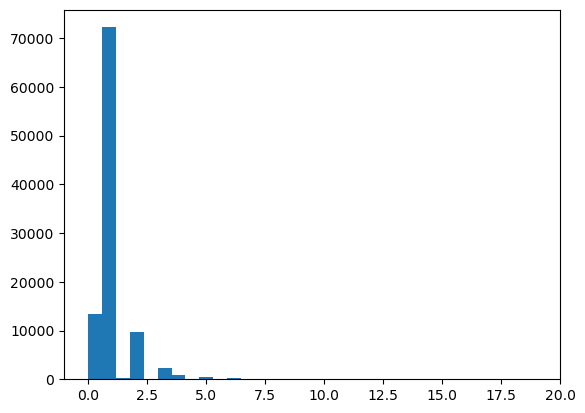

In [87]:
rs = in_degrees / out_degrees
plt.hist(rs, bins=300)
plt.xlim(-1, 20)
#plt.yscale('log')
plt.show()


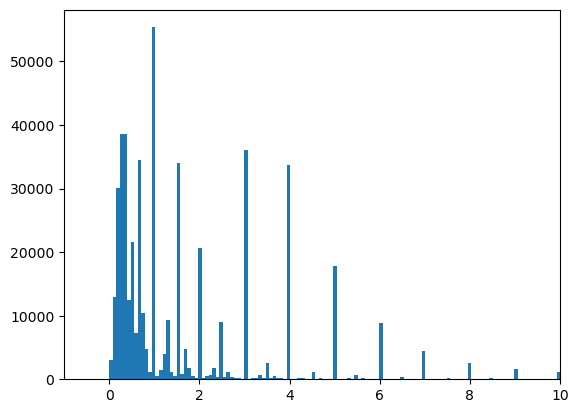

In [62]:
ds = in_degrees + out_degrees
rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, bins=len(np.unique(rs)))
plt.xlim(-1, 10)
plt.show()

In [74]:
gamma = 2.0
loc = 1.0
scale = 1.0
n = 100000

degrees = stats.pareto.rvs(gamma, loc=loc, scale=scale, size=n, random_state=42).round()
    
# if degree sum is odd, add one to a random degree
if degrees.sum() % 2 == 1:
    degrees[np.random.randint(n)] += 1
split = np.random.rand(n)

in_degrees = (degrees*split).round()
out_degrees = (degrees*(1-split)).round()

iters = 0
while in_degrees.sum() != out_degrees.sum() and iters < 100000:
    if in_degrees.sum() > out_degrees.sum():
        idx = np.random.choice(np.where(in_degrees > 1.0)[0])
        in_degrees[idx] -= 1
        out_degrees[np.random.randint(n)] += 1
    else:
        idx = np.random.choice(np.where(out_degrees > 1.0)[0])
        in_degrees[np.random.randint(n)] += 1
        out_degrees[idx] -= 1
    iters += 1
if in_degrees.sum() > out_degrees.sum():
    diff = in_degrees.sum() - out_degrees.sum()
    assert diff % 2 == 0
    in_degrees[np.argmax(in_degrees)] -= diff / 2
    out_degrees[np.argmax(out_degrees)] += diff / 2
elif in_degrees.sum() < out_degrees.sum():
    diff = out_degrees.sum() - in_degrees.sum()
    assert diff % 2 == 0
    in_degrees[np.argmax(in_degrees)] += diff / 2
    out_degrees[np.argmax(out_degrees)] -= diff / 2

print(in_degrees.sum(), out_degrees.sum())

146029.0 146029.0


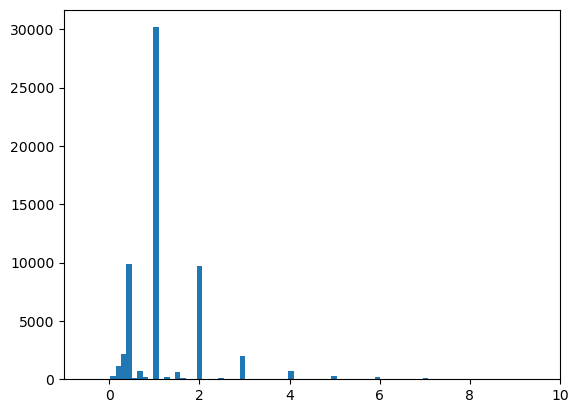

In [75]:
in_out_degrees = np.column_stack((in_degrees, out_degrees))
in_out_degrees = in_out_degrees[~(in_out_degrees == 0).any(axis=1)]
in_degrees = in_out_degrees[:, 0]
out_degrees = in_out_degrees[:, 1]
rs = in_degrees / out_degrees
plt.hist(rs, bins=len(np.unique(rs)))
plt.xlim(-1, 10)
#plt.yscale('log')
plt.show()

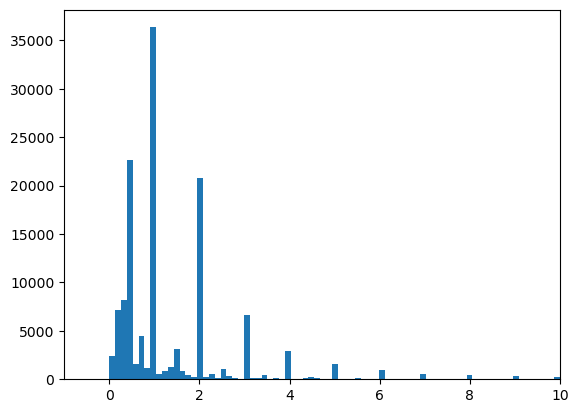

In [76]:
ds = in_degrees + out_degrees
rs = []
for i in ds:
    j = 1
    while j < i:
        r = j / (i-j)
        j += 1
        rs += [r]
plt.hist(rs, bins=len(np.unique(rs)))
plt.xlim(-1, 10)
plt.show()

In [138]:
df = pd.read_csv('/home/edvin/Desktop/flib/AMLsim/outputs/100K_accts/tx_log.csv')
df.head()

,step,type,amount,nameOrig,bankOrig,daysInBankOrig,phoneChangesOrig,oldbalanceOrig,newbalanceOrig,nameDest,bankDest,daysInBankDest,phoneChangesDest,oldbalanceDest,newbalanceDest,isSAR,alertID,modelType
0,0,INITALBALANCE,23512.33,-2,source,0,0,0.0,0.0,0,swedbank,0,0,23512.33,47024.67,0,-1,11
1,0,INITALBALANCE,41638.21,-2,source,0,0,0.0,0.0,1,swedbank,0,0,41638.21,83276.43,0,-1,11
2,0,INITALBALANCE,34793.32,-2,source,0,0,0.0,0.0,2,swedbank,0,0,34793.32,69586.65,0,-1,11
3,0,INITALBALANCE,57312.83,-2,source,0,0,0.0,0.0,3,swedbank,0,0,57312.83,114625.67,0,-1,11
4,0,INITALBALANCE,93481.28,-2,source,0,0,0.0,0.0,4,swedbank,0,0,93481.28,186962.57,0,-1,11


In [139]:
df = df[df['bankOrig'] != 'source']
df = df[df['bankDest'] != 'sink']
df.head()

,step,type,amount,nameOrig,bankOrig,daysInBankOrig,phoneChangesOrig,oldbalanceOrig,newbalanceOrig,nameDest,bankDest,daysInBankDest,phoneChangesDest,oldbalanceDest,newbalanceDest,isSAR,alertID,modelType
171914,1,TRANSFER,267.85,25434,swedbank,2,0,135958.12,135690.26,78500,others,1,0,13797.51,14065.37,0,-1,11
171928,1,TRANSFER,672.12,23154,swedbank,2,0,76662.54,75990.42,67182,others,1,0,143960.31,144632.43,0,-1,11
171935,1,TRANSFER,995.84,25138,swedbank,2,0,97985.53,96989.70,60908,others,1,0,127904.96,128900.81,0,-1,11
171941,1,TRANSFER,271.50,22383,swedbank,2,0,61391.99,61120.48,45613,others,1,0,10946.83,11218.34,0,-1,11
171975,1,TRANSFER,692.51,20399,swedbank,2,0,78807.25,78114.75,81224,others,1,0,34306.48,34998.99,0,-1,11


In [157]:
len(pd.unique(df[['nameOrig', 'nameDest']].values.ravel('K')))

64334

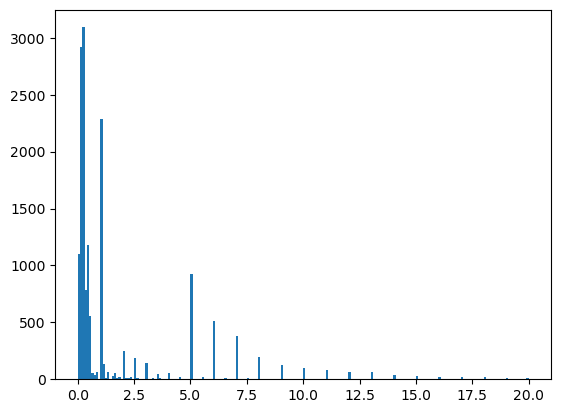

In [162]:
out_degs = df['nameOrig'].value_counts()
in_degs = df['nameDest'].value_counts()
degs = pd.concat([in_degs, out_degs], axis=1).fillna(0)
in_out_degs = degs.to_numpy()
in_out_degs = in_out_degs[~(in_out_degs == 0).any(axis=1)]

in_degs = in_out_degs[:, 0]
out_degs = in_out_degs[:, 1]

rs = in_degs / out_degs
plt.hist(rs, range=(0,20), bins=200)
plt.xlim(-1, 21)
plt.show()
